 ###### Pool_card   -> # de Cartas que o usuário ja selecionou
 ###### Pack_card   -> # de Cartas que saíram no pacote em questão
 ###### Pack_Number -> # Rodada do pack atual
 ###### Pick_Number -> # Rodada do pick atual

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [21]:
#Read all_decks file and get integer columns
df_deck = pd.read_csv("Data/all_decks.csv",nrows=1)
#(columns int64 -> int8)
columns = []
for column in df_deck.columns.unique():
    if 'pool_' in column:
        columns.append(column)
    if 'pack_card_' in column:
        columns.append(column)

# Make the dtype dict (int64 -> int8)
conversion_integers_columns = {item: np.int8 for item in columns}
conversion_integers_columns['user_game_win_rate_bucket'] = np.float32
conversion_integers_columns['pick'] = 'category'

In [23]:
#df_deck = pd.read_csv("Data/all_decks.csv",dtype=conversion_integers_columns)
best_users_df = pd.read_csv("Data/draft_data_best_players_sc.csv",dtype=conversion_integers_columns)

In [25]:
best_users_df.head(1)

,expansion,event_type,draft_id,draft_time,rank,event_match_wins,event_match_losses,pack_number,pick_number,pick,pick_maindeck_rate,pick_sideboard_in_rate,pack_card_Adaptive Automaton,pack_card_Aeronaut Cavalry,pack_card_Aeronaut's Wings,pack_card_Aetherflux Reservoir,pack_card_Air Marshal,pack_card_Airlift Chaplain,pack_card_Alloy Animist,pack_card_Altar of Dementia,pack_card_Ambush Paratrooper,pack_card_Arbalest Engineers,pack_card_Arcane Proxy,pack_card_Argivian Avenger,"pack_card_Argoth, Sanctum of Nature",pack_card_Argothian Opportunist,pack_card_Argothian Sprite,pack_card_Arms Race,pack_card_Ashnod's Altar,pack_card_Ashnod's Harvester,pack_card_Ashnod's Intervention,"pack_card_Ashnod, Flesh Mechanist",pack_card_Astral Cornucopia,pack_card_Audacity,pack_card_Autonomous Assembler,pack_card_Awaken the Woods,pack_card_Battery Bearer,pack_card_Battlefield Butcher,pack_card_Battlefield Forge,pack_card_Bitter Reunion,pack_card_Blackblade Reforged,pack_card_Bladecoil Serpent,pack_card_Blanchwood Armor,pack_card_Blanchwood Prowler,pack_card_Blast Zone,pack_card_Blitz Automaton,pack_card_Bone Saw,pack_card_Boulderbranch Golem,pack_card_Brotherhood's End,pack_card_Brushland,pack_card_Burnished Hart,pack_card_Burrowing Razormaw,pack_card_Bushwhack,pack_card_Caged Sun,pack_card_Calamity's Wake,pack_card_Carrion Locust,pack_card_Chromatic Lantern,pack_card_Chromatic Star,pack_card_Citanul Stalwart,pack_card_Cityscape Leveler,pack_card_Clay Champion,pack_card_Clay Revenant,pack_card_Cloud Key,pack_card_Coastal Bulwark,pack_card_Combat Courier,pack_card_Combat Thresher,pack_card_Conscripted Infantry,pack_card_Corrupt,pack_card_Cradle Clearcutter,pack_card_Curate,pack_card_Deadly Riposte,pack_card_Deathbloom Ritualist,pack_card_Defabricate,pack_card_Defense Grid,pack_card_Demolition Field,pack_card_Depth Charge Colossus,pack_card_Desynchronize,pack_card_Diabolic Intent,pack_card_Disciples of Gix,pack_card_Disenchant,pack_card_Disfigure,pack_card_Door to Nothingness,pack_card_Draconic Destiny,"pack_card_Drafna, Founder of Lat-Nam",pack_card_Dreams of Steel and Oil,pack_card_Dredging Claw,pack_card_Dwarven Forge-Chanter,pack_card_Elsewhere Flask,pack_card_Emergency Weld,pack_card_Energy Refractor,pack_card_Epic Confrontation,pack_card_Evangel of Synthesis,pack_card_Evolving Wilds,pack_card_Excavation Explosion,pack_card_Fade from History,pack_card_Fallaji Archaeologist,pack_card_Fallaji Chaindancer,pack_card_Fallaji Dragon Engine,pack_card_Fallaji Excavation,pack_card_Fallaji Vanguard,pack_card_Fateful Handoff,pack_card_Fauna Shaman,"pack_card_Feldon, Ronom Excavator",pack_card_Flow of Knowledge,pack_card_Fog of War,pack_card_Forest,pack_card_Forging the Anchor,pack_card_Fortified Beachhead,pack_card_Foundry Inspector,pack_card_Gaea's Courser,pack_card_Gaea's Gift,pack_card_Giant Cindermaw,pack_card_Giant Growth,pack_card_Gilded Lotus,pack_card_Gix's Caress,pack_card_Gix's Command,"pack_card_Gix, Yawgmoth Praetor",pack_card_Gixian Infiltrator,pack_card_Gixian Puppeteer,pack_card_Gixian Skullflayer,pack_card_Gnarlroot Pallbearer,pack_card_Gnawing Vermin,pack_card_Go for the Throat,pack_card_Goblin Blast-Runner,pack_card_Goblin Charbelcher,pack_card_Goblin Firebomb,pack_card_Goring Warplow,pack_card_Great Desert Prospector,pack_card_Gruesome Realization,pack_card_Gurgling Anointer,"pack_card_Gwenna, Eyes of Gaea","pack_card_Hajar, Loyal Bodyguard",pack_card_Hall of Tagsin,"pack_card_Harbin, Vanguard Aviator",pack_card_Haywire Mite,pack_card_Heavyweight Demolisher,pack_card_Helm of the Host,pack_card_Hero of the Dunes,pack_card_Hoarding Recluse,pack_card_Horned Stoneseeker,pack_card_Hostile Negotiations,pack_card_Howling Mine,pack_card_Hulking Metamorph,pack_card_Hurkyl's Final Meditation,"pack_card_Hurkyl, Master Wizard",pack_card_Ichor Wellspring,pack_card_In the Trenches,pack_card_Inspiring Statuary,pack_card_Involuntary Cooldown,pack_card_Iron-Craw Crusher,pack_card_Island,pack_card_Ivory Tower,pack_card_Jalum Tome,pack_card_Journeyer's Ki

In [24]:
best_users_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448359 entries, 0 to 2448358
Columns: 684 entries, expansion to user_game_win_rate_bucket
dtypes: category(1), float32(1), float64(2), int64(5), int8(670), object(5)
memory usage: 2.5 GB


In [17]:
best_users_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395467 entries, 0 to 2395466
Columns: 684 entries, expansion to user_game_win_rate_bucket
dtypes: float64(3), int64(5), int8(670), object(6)
memory usage: 2.6 GB


In [20]:
best_users_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395467 entries, 0 to 2395466
Columns: 684 entries, expansion to user_game_win_rate_bucket
dtypes: float64(3), int64(5), int8(670), object(6)
memory usage: 2.6 GB


# Data Exploration

In [4]:
df_deck.head(1)

,expansion,event_type,draft_id,draft_time,rank,event_match_wins,event_match_losses,pack_number,pick_number,pick,pick_maindeck_rate,pick_sideboard_in_rate,pack_card_Adaptive Automaton,pack_card_Aeronaut Cavalry,pack_card_Aeronaut's Wings,pack_card_Aetherflux Reservoir,pack_card_Air Marshal,pack_card_Airlift Chaplain,pack_card_Alloy Animist,pack_card_Altar of Dementia,pack_card_Ambush Paratrooper,pack_card_Arbalest Engineers,pack_card_Arcane Proxy,pack_card_Argivian Avenger,"pack_card_Argoth, Sanctum of Nature",pack_card_Argothian Opportunist,pack_card_Argothian Sprite,pack_card_Arms Race,pack_card_Ashnod's Altar,pack_card_Ashnod's Harvester,pack_card_Ashnod's Intervention,"pack_card_Ashnod, Flesh Mechanist",pack_card_Astral Cornucopia,pack_card_Audacity,pack_card_Autonomous Assembler,pack_card_Awaken the Woods,pack_card_Battery Bearer,pack_card_Battlefield Butcher,pack_card_Battlefield Forge,pack_card_Bitter Reunion,pack_card_Blackblade Reforged,pack_card_Bladecoil Serpent,pack_card_Blanchwood Armor,pack_card_Blanchwood Prowler,pack_card_Blast Zone,pack_card_Blitz Automaton,pack_card_Bone Saw,pack_card_Boulderbranch Golem,pack_card_Brotherhood's End,pack_card_Brushland,pack_card_Burnished Hart,pack_card_Burrowing Razormaw,pack_card_Bushwhack,pack_card_Caged Sun,pack_card_Calamity's Wake,pack_card_Carrion Locust,pack_card_Chromatic Lantern,pack_card_Chromatic Star,pack_card_Citanul Stalwart,pack_card_Cityscape Leveler,pack_card_Clay Champion,pack_card_Clay Revenant,pack_card_Cloud Key,pack_card_Coastal Bulwark,pack_card_Combat Courier,pack_card_Combat Thresher,pack_card_Conscripted Infantry,pack_card_Corrupt,pack_card_Cradle Clearcutter,pack_card_Curate,pack_card_Deadly Riposte,pack_card_Deathbloom Ritualist,pack_card_Defabricate,pack_card_Defense Grid,pack_card_Demolition Field,pack_card_Depth Charge Colossus,pack_card_Desynchronize,pack_card_Diabolic Intent,pack_card_Disciples of Gix,pack_card_Disenchant,pack_card_Disfigure,pack_card_Door to Nothingness,pack_card_Draconic Destiny,"pack_card_Drafna, Founder of Lat-Nam",pack_card_Dreams of Steel and Oil,pack_card_Dredging Claw,pack_card_Dwarven Forge-Chanter,pack_card_Elsewhere Flask,pack_card_Emergency Weld,pack_card_Energy Refractor,pack_card_Epic Confrontation,pack_card_Evangel of Synthesis,pack_card_Evolving Wilds,pack_card_Excavation Explosion,pack_card_Fade from History,pack_card_Fallaji Archaeologist,pack_card_Fallaji Chaindancer,pack_card_Fallaji Dragon Engine,pack_card_Fallaji Excavation,pack_card_Fallaji Vanguard,pack_card_Fateful Handoff,pack_card_Fauna Shaman,"pack_card_Feldon, Ronom Excavator",pack_card_Flow of Knowledge,pack_card_Fog of War,pack_card_Forest,pack_card_Forging the Anchor,pack_card_Fortified Beachhead,pack_card_Foundry Inspector,pack_card_Gaea's Courser,pack_card_Gaea's Gift,pack_card_Giant Cindermaw,pack_card_Giant Growth,pack_card_Gilded Lotus,pack_card_Gix's Caress,pack_card_Gix's Command,"pack_card_Gix, Yawgmoth Praetor",pack_card_Gixian Infiltrator,pack_card_Gixian Puppeteer,pack_card_Gixian Skullflayer,pack_card_Gnarlroot Pallbearer,pack_card_Gnawing Vermin,pack_card_Go for the Throat,pack_card_Goblin Blast-Runner,pack_card_Goblin Charbelcher,pack_card_Goblin Firebomb,pack_card_Goring Warplow,pack_card_Great Desert Prospector,pack_card_Gruesome Realization,pack_card_Gurgling Anointer,"pack_card_Gwenna, Eyes of Gaea","pack_card_Hajar, Loyal Bodyguard",pack_card_Hall of Tagsin,"pack_card_Harbin, Vanguard Aviator",pack_card_Haywire Mite,pack_card_Heavyweight Demolisher,pack_card_Helm of the Host,pack_card_Hero of the Dunes,pack_card_Hoarding Recluse,pack_card_Horned Stoneseeker,pack_card_Hostile Negotiations,pack_card_Howling Mine,pack_card_Hulking Metamorph,pack_card_Hurkyl's Final Meditation,"pack_card_Hurkyl, Master Wizard",pack_card_Ichor Wellspring,pack_card_In the Trenches,pack_card_Inspiring Statuary,pack_card_Involuntary Cooldown,pack_card_Iron-Craw Crusher,pack_card_Island,pack_card_Ivory Tower,pack_card_Jalum Tome,pack_card_Journeyer's Ki

<AxesSubplot:xlabel='rank', ylabel='user_game_win_rate_bucket'>

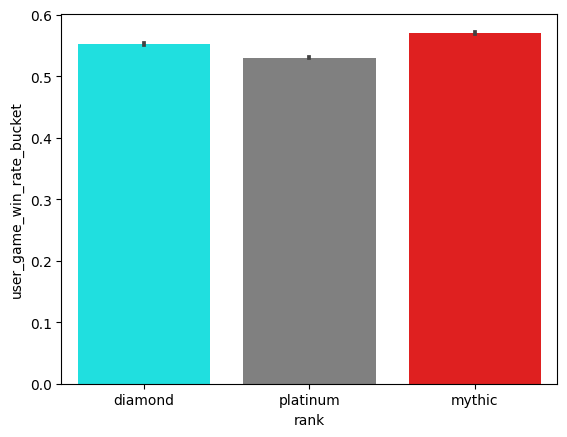

In [5]:
sns.barplot(df_deck,x=df_deck['rank'], y=df_deck['user_game_win_rate_bucket'],estimator='mean', palette=['cyan', 'gray', 'red'])

<AxesSubplot:xlabel='rank', ylabel='user_n_games_bucket'>

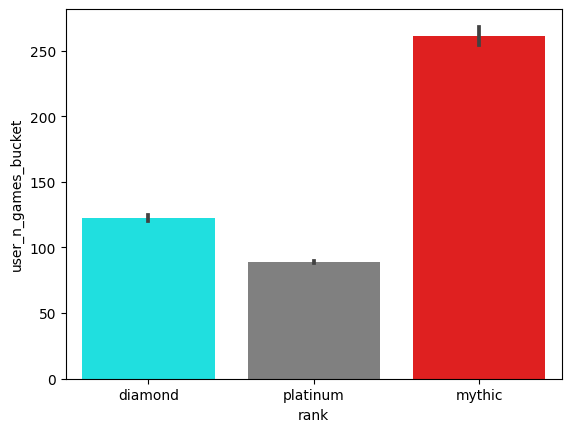

In [6]:
sns.barplot(df_deck,x=df_deck['rank'], y=df_deck['user_n_games_bucket'], palette=['cyan', 'gray', 'red'])

### First step -> Make the sinergy between the cards
    Sinergy = Quantity of if one card appears on one deck -> this other card will appears too.

In [7]:
df_deck['rank'].value_counts()
df_filtered = df_deck[df_deck['rank'] == 'diamond']